In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import model_selection as ms
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Problem 1
Assume that $X_1, X_2, ...$ is a sequence of iid Bernoulli random variables, and $X_i$ has probability $p$ of success.  Assume that $Y_1,Y_2, ...$ is another sequence of iid Bernoulli random variables, and every $Y_i$ has probability $q$ of success. Prove that if $p > q$, then $Prob(\frac{\sum_{i=1}^n X_i}{n} > \frac{1}{2}) > Prob(\frac{\sum_{i=1}^n Y_i}{n}  > \frac{1}{2})$ for all $n$. Hint: write out a binomial expansion of the probabilities involved compare, term by term.

In [2]:
# I will do this problem on paper and turn it in.

# Problem 2
Assume that $X_i$ are iid Bernoulli random variables with probability $p ≥ \frac{2}{3}$ of success.  Use Cramer's theorem to give a lower bound on the number $n$ needed to give 95% confidence that $\sum_{i=1}^n \frac{X_i}{n} > \frac{1}{2}$. 

In [3]:
# I will also do this problem on paper and turn it in.

# Problem 3
Use scikit learn's random forest classifier to predict survival for the titanic dataset (use an 80-20 train-test split). Experiment with `n_estimators` in range$(20,201,20)$ and `max_depth` in range$(2,10)$ and compare training time and prediction accuracy.  Also compare to the results you obtained last time with a singe tree.

In [4]:
titanic = pd.read_csv('titanic.csv', header = 0)
titanic.dropna(axis=0, subset=['Survived'], inplace=True)
titanic['Age'].fillna(value=np.int(titanic['Age'].mean()), inplace=True)
titanic['Fare'].fillna(value=titanic['Age'].mean(), inplace=True)
# Creating categorical variables for Embarked, Sex, and home.dest then prep data
#titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex'])
titanic['Embarked'] = titanic['Embarked'].astype('category').cat.codes
titanic['Male'] = (titanic['Sex']=='male').astype(np.int)
titanic['home.dest'] = titanic['home.dest'].astype('category').cat.codes
y = titanic.Survived
titanic.drop(['Survived','Name','Cabin', 'Sex', 'Boat', 'Body','Ticket'], axis=1, inplace=True)


# Test-Train Split
xtrain, xtest, ytrain, ytest = ms.train_test_split(titanic, y, test_size = .8)

# Experiment with n_estimators and max_depth
n_estimators = []
max_depth = []
accuracy = []
train_time = []
for n in range(20,201,20):
    for depth in range(2,10):
        n_estimators.append(n)
        max_depth.append(depth)
        start = time.time()
        forest = RandomForestClassifier(n_estimators=n, max_depth=depth)
        forest.fit(xtrain,ytrain)
        train_time.append(time.time() - start)
        accuracy.append(forest.score(xtest,ytest))

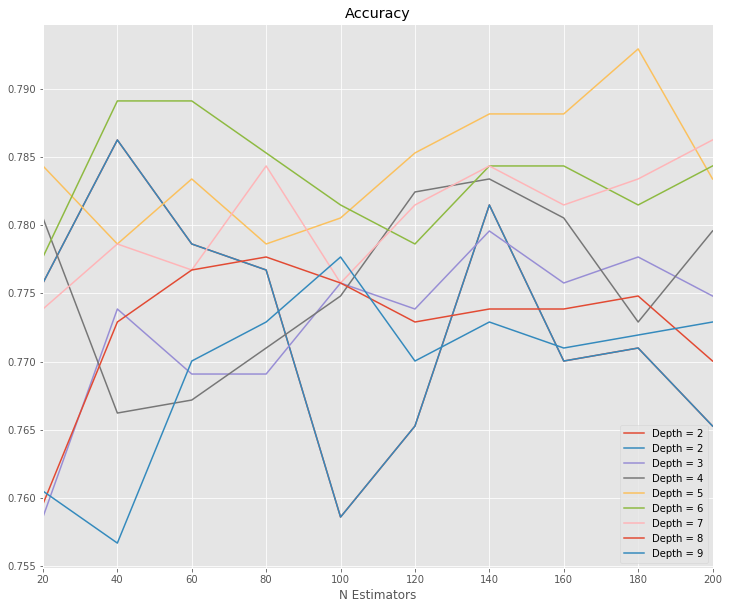

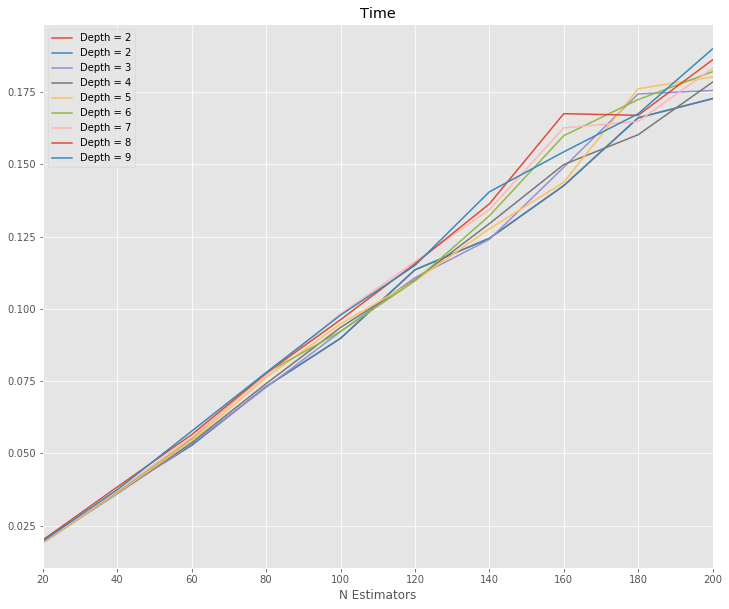

In [5]:
results = pd.DataFrame({'N Estimators':n_estimators, 
                        'Max Depth':max_depth,
                        'Accuracy':accuracy,
                        'Time':train_time})

groups = results.groupby('Max Depth')
first = True
for name, group in groups:
    if first:
        ax = group.plot(x='N Estimators', y='Accuracy', figsize=(12,10), title='Accuracy', label='Depth = {}'.format(name))
        first = False
    group.plot(x='N Estimators', y='Accuracy', figsize=(12,10), ax=ax, title='Accuracy', label='Depth = {}'.format(name))
plt.show()

first = True
for name, group in groups:
    if first:
        ax = group.plot(x='N Estimators', y='Time', figsize=(12,10), title='Time', label='Depth = {}'.format(name))
        first = False
    group.plot(x='N Estimators', y='Time', figsize=(12,10), ax=ax, title='Time', label='Depth = {}'.format(name))
plt.show()
    
#groups.plot(x='Max Depth', y='Accuracy', figsize=(12,10), 
#           title='Accuracy', legend=True)
#groups.plot(x='Max Depth', y='Time', figsize=(12,10), 
#           title='Train Time', legend=True)

In [6]:
results.describe()

,Accuracy,Max Depth,N Estimators,Time
count,80.000000,80.000000,80.000000,80.000000
mean,0.776574,5.500000,110.000000,0.102825
std,0.007596,2.305744,57.808063,0.053737
min,0.756679,2.000000,20.000000,0.018917
25%,0.772901,3.750000,60.000000,0.054887
50%,0.776718,5.500000,110.000000,0.103943
75%,0.781727,7.250000,160.000000,0.151015
max,0.792939,9.000000,200.000000,0.189942


In [7]:
results.sort_values('Accuracy', ascending=False).head(5)

,Accuracy,Max Depth,N Estimators,Time
67,0.792939,5,180,0.176157
20,0.789122,6,60,0.055077
12,0.789122,6,40,0.036646
51,0.788168,5,140,0.127678
59,0.788168,5,160,0.143783


In [8]:
results.sort_values('Accuracy', ascending=False).tail(5)

,Accuracy,Max Depth,N Estimators,Time
7,0.760496,9,20,0.019629
6,0.759542,8,20,0.020033
32,0.758588,2,100,0.089782
1,0.758588,3,20,0.019207
15,0.756679,9,40,0.037454


# Problem 4
Do the same thing as #3, but on a large dataset related to your final project. 

In [9]:
# Import dataset.
default = pd.read_csv("default.csv")
y = default['default']
X = default.drop(['default'], axis=1)

# Test train split.
xtrain, xtest, ytrain, ytest = ms.train_test_split(X, y, train_size=.2)

# Experiment with n_estimators and max_depth
n_estimators = []
max_depth = []
accuracy = []
train_time = []
for n in range(20,201,20):
    for depth in range(2,10):
        n_estimators.append(n)
        max_depth.append(depth)
        start = time.time()
        forest = RandomForestClassifier(n_estimators=n, max_depth=depth)
        forest.fit(xtrain,ytrain)
        train_time.append(time.time() - start)
        accuracy.append(forest.score(xtest,ytest))

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


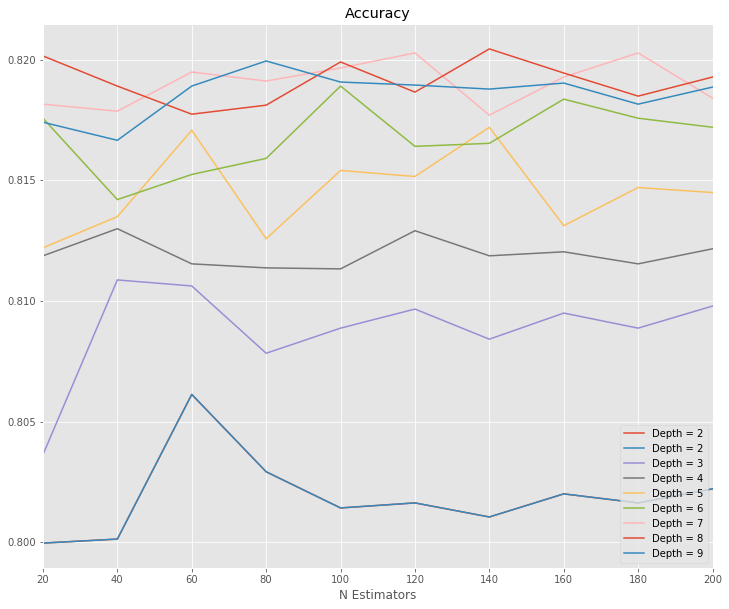

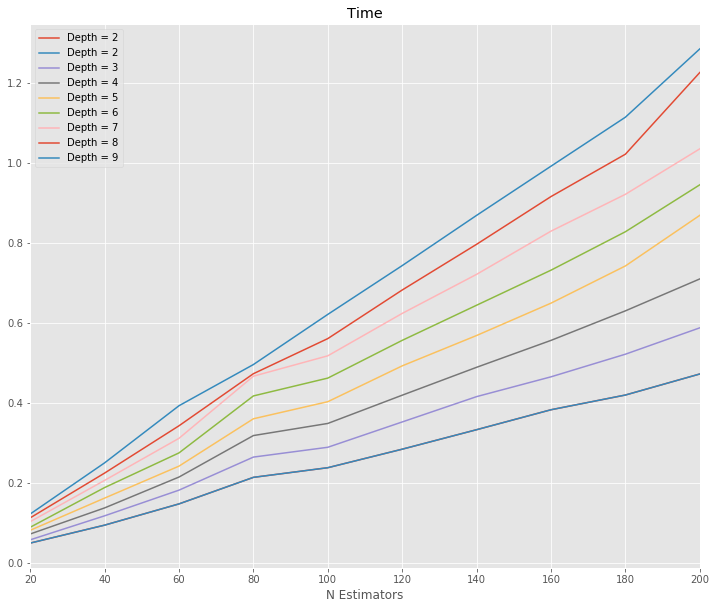

In [10]:
results2 = pd.DataFrame({'N Estimators':n_estimators, 
                        'Max Depth':max_depth,
                        'Accuracy':accuracy,
                        'Time':train_time})

groups2 = results2.groupby('Max Depth')
first = True
for name, group in groups2:
    if first:
        ax = group.plot(x='N Estimators', y='Accuracy', figsize=(12,10), title='Accuracy', label='Depth = {}'.format(name))
        first = False
    group.plot(x='N Estimators', y='Accuracy', figsize=(12,10), ax=ax, title='Accuracy', label='Depth = {}'.format(name))
plt.show()

first = True
for name, group in groups2:
    if first:
        ax = group.plot(x='N Estimators', y='Time', figsize=(12,10), title='Time', label='Depth = {}'.format(name))
        first = False
    group.plot(x='N Estimators', y='Time', figsize=(12,10), ax=ax, title='Time', label='Depth = {}'.format(name))
plt.show()

In [14]:
results2.describe()

,Accuracy,Max Depth,N Estimators,Time
count,80.000000,80.000000,80.000000,80.000000
mean,0.813847,5.500000,110.000000,0.481170
std,0.005864,2.305744,57.808063,0.298335
min,0.799958,2.000000,20.000000,0.050537
25%,0.811219,3.750000,60.000000,0.241635
50%,0.815667,5.500000,110.000000,0.441199
75%,0.818698,7.250000,160.000000,0.657568
max,0.820458,9.000000,200.000000,1.283894


In [15]:
results2.sort_values('Accuracy', ascending=False).head(5)

,Accuracy,Max Depth,N Estimators,Time
54,0.820458,8,140,0.796262
69,0.820292,7,180,0.921014
45,0.820292,7,120,0.623763
6,0.820167,8,20,0.113557
31,0.819958,9,80,0.496170


In [16]:
results2.sort_values('Accuracy', ascending=False).tail(5)

,Accuracy,Max Depth,N Estimators,Time
64,0.801625,2,180,0.420069
32,0.801417,2,100,0.238676
48,0.801042,2,140,0.333532
8,0.800125,2,40,0.095324
0,0.799958,2,20,0.050537
